# Fuzzy Time Series (FTS)

In [5]:
import sys
sys.path.append('D:/source/repos')
from utilities.std_imports import *
import warnings
warnings.filterwarnings('ignore')
from pyFTS.data import Enrollments
from pyFTS.partitioners import Grid
from pyFTS.common import FLR
from pyFTS.models import chen
from pyFTS.common import Util

### Load data

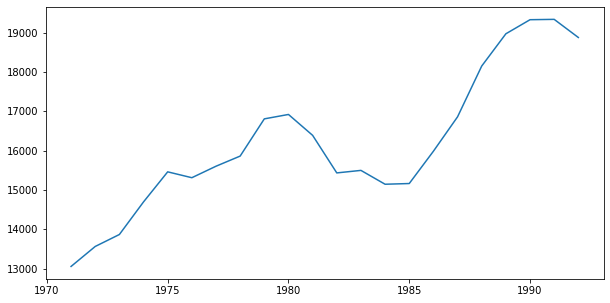

In [9]:
df = Enrollments.get_dataframe()
ts = df['Enrollments'].values

plt.figure(figsize=[10,5])
plt.plot(df['Year'],df['Enrollments']);

### Training 

Definition of the Universe of Discourse (U) & Linguistic variable creation

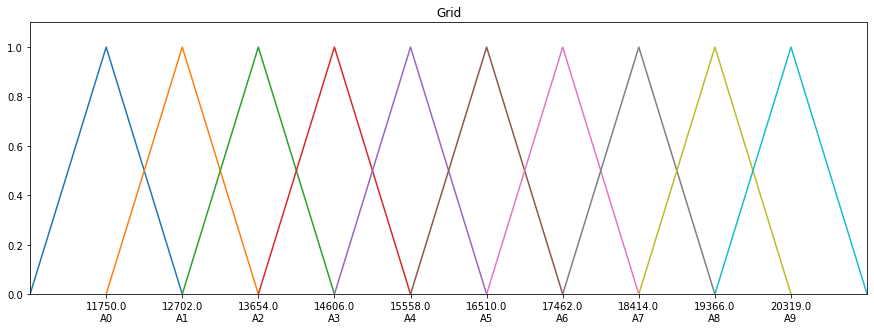

In [13]:
fs = Grid.GridPartitioner(data=ts, npart=10)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
fs.plot(ax)

### Fuzzyfication

In [15]:
ts_fuzzy = fs.fuzzyfy(ts, method='maximum', mode='sets')
pd.DataFrame({'ts': ts, 'ts_fuzzy' : ts_fuzzy})

,ts,ts_fuzzy
0,13055,A1
1,13563,A2
2,13867,A2
3,14696,A3
4,15460,A4
5,15311,A4
6,15603,A4
7,15861,A4
8,16807,A5
9,16919,A5


### Temporal patterns

In [19]:
patterns = FLR.generate_non_recurrent_flrs(ts_fuzzy)
[str(k) for k in patterns]

['A1 -> A2',
 'A2 -> A2',
 'A2 -> A3',
 'A3 -> A4',
 'A4 -> A4',
 'A4 -> A5',
 'A5 -> A5',
 'A5 -> A4',
 'A5 -> A7',
 'A7 -> A8',
 'A8 -> A8',
 'A8 -> A7']

### Rule generation

In [21]:
model = chen.ConventionalFTS(partitioner=fs)
model.fit(ts)
print(model)

Conventional FTS:
A1 -> A2
A2 -> A2,A3
A3 -> A4
A4 -> A4,A5
A5 -> A4,A5,A7
A8 -> A7,A8
A7 -> A8



### Forecasting

Input value fuzzyfication

In [23]:
ts_fuzzy = fs.fuzzyfy(18876, method='maximum', mode='sets')
ts_fuzzy

'A7'

Find the compatible rules & defuzzyfy

In [24]:
model.predict([18876])

[19366.460000000006]

### Validation

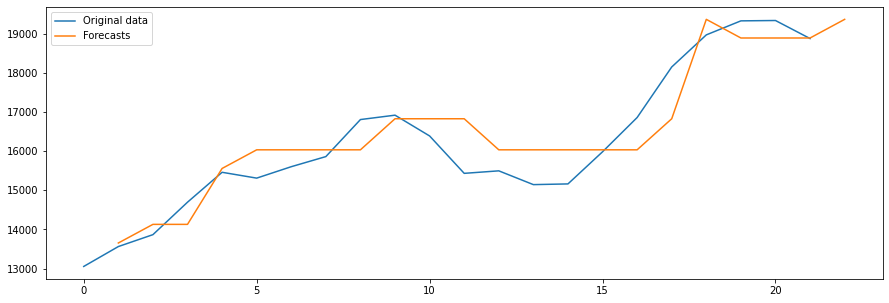

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

fcsts = model.predict(ts)
fcsts.insert(0,None)

orig, = plt.plot(ts, label="Original data")
pred, = plt.plot(fcsts, label="Forecasts")

plt.legend(handles=[orig, pred]);

### Credits & Links

https://github.com/PYFTS/notebooks